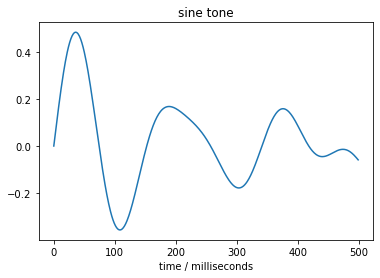

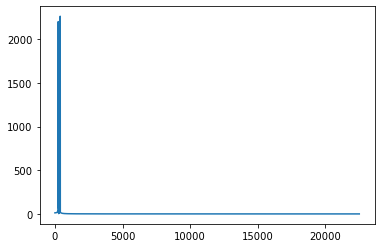

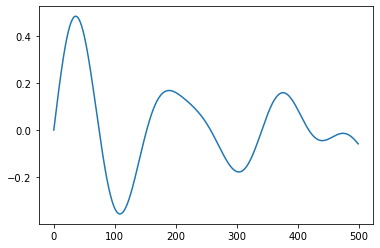

In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sounddevice as sd
import time

duration = 1
amplitude = 0.1
#frequency = 293.6648
fs = 45000

mi = 329.630
sol = 392
re = 293.660
do = 261.630
si = 246.940

def nt(note_fs, time):
  timeSamples = np.arange(np.ceil(time * fs)) / fs
  return amplitude * np.sin(2 * np.pi * note_fs * timeSamples)

signalSumm = np.concatenate((nt(mi, 0.6), nt(mi, 0.4), nt(sol, 0.4), nt(mi, 0.4), nt(re, 0.5), nt(do, 0.6),
                             nt(si, 0.5), nt(mi, 0.4), nt(mi, 0.4), nt(sol, 0.4), nt(mi, 0.4), nt(re, 0.4), nt(do, 0.4),
                             nt(re, 0.4), nt(do, 0.3), nt(si, 0.5)), axis = 0)
#sd.play(signalSumm, fs)

signal = nt(mi, duration) + nt(sol, duration) + nt(re, duration) + nt(do, duration) + nt(si, duration)
n = duration * fs

plt.plot(signal[:500])
plt.title("sine tone")
plt.xlabel("time / milliseconds")
plt.show()

spector = np.fft.rfft(signal)
x_axis = np.fft.rfftfreq(n, 1/fs)

plt.plot(x_axis, np.abs(spector))
plt.show()

new_sig = np.fft.irfft(spector)
plt.plot(new_sig[:500])
plt.show()